In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [16]:
df = pd.read_csv("/Users/kristijanboshev/Desktop/My_Projcets/Bank_loan/bank.csv")

df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


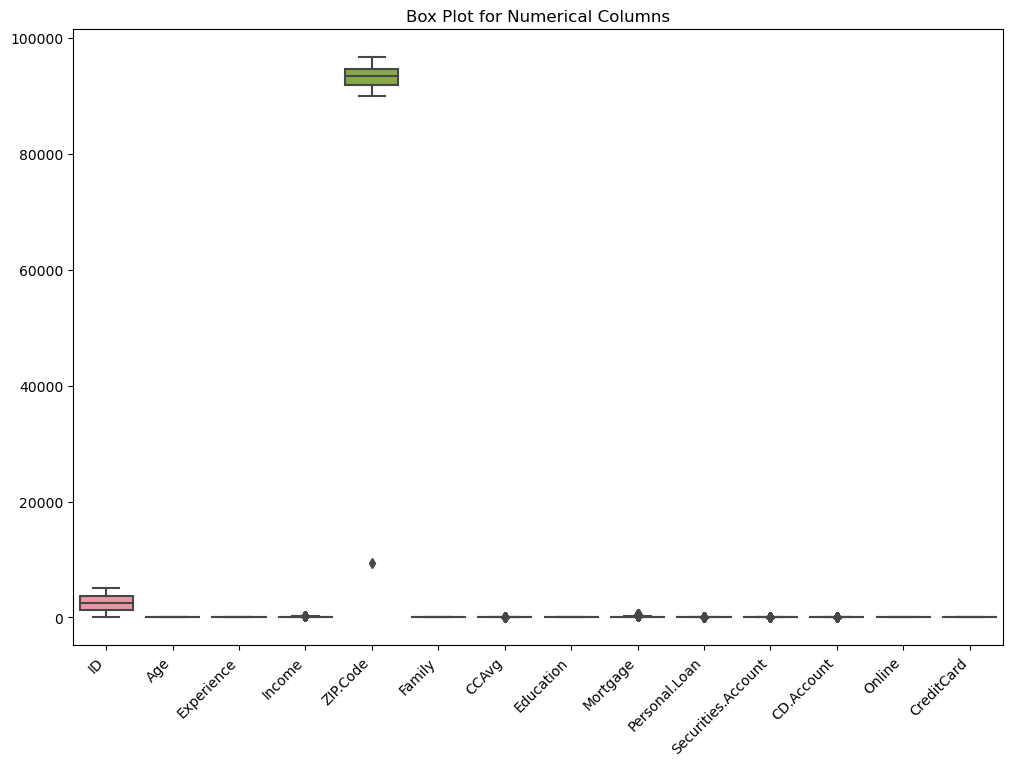

In [18]:
num_columns = df.select_dtypes(include='number')

plt.figure(figsize=(12,8))
sns.boxplot(data=num_columns)
plt.title("Box Plot for Numerical Columns")
plt.xticks(rotation = 45, ha = 'right')

plt.show()

In [19]:
df.columns = [col.replace('.','_') for col in df.columns]

df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [20]:
X = df.drop(['ID','ZIP_Code','Personal_Loan'],axis = 1)
y = df['Personal_Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
pipeline_rf = Pipeline([
    ('scaler',StandardScaler()),
    ('model',RandomForestClassifier())
])

pipeline_svm = Pipeline([
    ('scaler',StandardScaler()),
    ('model',SVC())
])

pipeline_lr = Pipeline([
    ('scaler',StandardScaler()),
    ('model',LogisticRegression())
])

pipeline_lda = Pipeline([
    ('scaler',StandardScaler()),
    ('model',LinearDiscriminantAnalysis())
])

pipeline_qda = Pipeline([
    ('scaler',StandardScaler()),
    ('model',QuadraticDiscriminantAnalysis())
])

In [22]:
pipeline_rf.fit(X_train,y_train)
pipeline_svm.fit(X_train,y_train)
pipeline_lr.fit(X_train,y_train)
pipeline_lda.fit(X_train,y_train)
pipeline_qda.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', QuadraticDiscriminantAnalysis())])

In [23]:
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_svm = pipeline_svm.predict(X_test)
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_lda = pipeline_lda.predict(X_test)
y_pred_qda = pipeline_qda.predict(X_test)

In [24]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
accuracy_qda = accuracy_score(y_test, y_pred_qda)

print("Random Forest Accuracy:", accuracy_rf)
print("SVM Accuracy:", accuracy_svm)
print("Logistic Regression Accuracy:", accuracy_lr)
print("LDA Accuarcy:", accuracy_lda)
print("QDA Accuarcy:", accuracy_qda)

Random Forest Accuracy: 0.99
SVM Accuracy: 0.976
Logistic Regression Accuracy: 0.955
LDA Accuarcy: 0.943
QDA Accuarcy: 0.933


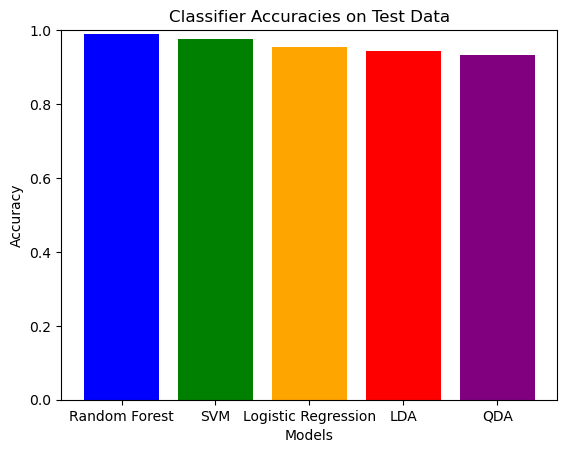

In [26]:
classifiers = ['Random Forest', 'SVM', 'Logistic Regression', 'LDA', 'QDA']

accuracies = [accuracy_rf, accuracy_svm, accuracy_lr, accuracy_lda, accuracy_qda]

plt.bar(classifiers, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.ylim(0, 1)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies on Test Data')
plt.show()

# HYPERPARAMETER TUNING

In [40]:
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}
pipeline_rf_cv = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5))
])

pipeline_rf_cv.fit(X_train, y_train)

y_pred_rf_cv = pipeline_rf_cv.predict(X_test)

accuracy_rf_cv = accuracy_score(y_test, y_pred_rf_cv)
print("Random Forest Accuracy (with CV):", accuracy_rf_cv)

best_params_rf = pipeline_rf_cv.named_steps['model'].best_params_
print("\nBest Hyperparameters for RandomForestClassifier:")
print(best_params_rf)


Random Forest Accuracy (with CV): 0.992

Best Hyperparameters for RandomForestClassifier:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [41]:
print("Classification report:",classification_report(y_test,y_pred_rf_cv).to_stri)

Classification report:               precision    recall  f1-score   support

           0       0.99      1.00      1.00       895
           1       0.99      0.93      0.96       105

    accuracy                           0.99      1000
   macro avg       0.99      0.97      0.98      1000
weighted avg       0.99      0.99      0.99      1000



In [43]:
print("The performance I achieved with HyperParametered RandomForest:", accuracy_score(y_test,y_pred_rf_cv))

The performance I achieved with HyperParametered RandomForest: 0.992


/Users/kristijanboshev/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


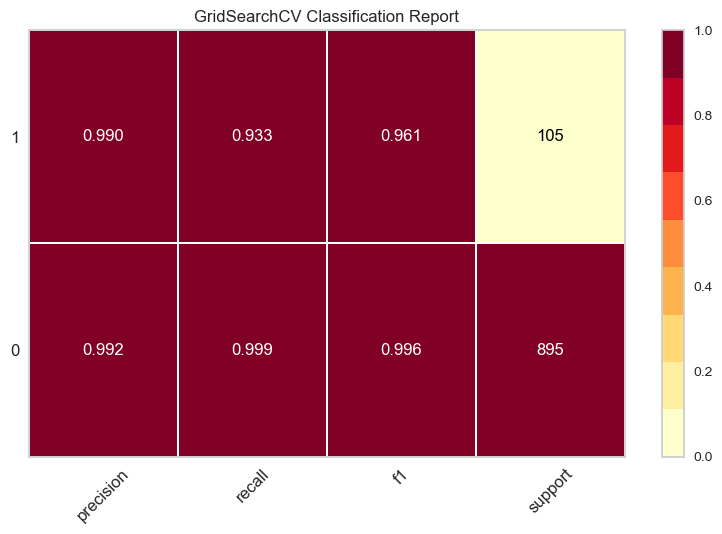

<AxesSubplot:title={'center':'GridSearchCV Classification Report'}>

In [60]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(pipeline_rf_cv, support=True)
visualizer.fit(X_train, y_train)

visualizer.score(X_test, y_test)

visualizer.show()

                                                                    Кристијан Бошев 203159